In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
avocado_csv = "https://raw.githubusercontent.com/data-88e/textbook/master/content/01-demand/avocados.csv"
avocados = pd.read_csv(avocado_csv)

<AxesSubplot: xlabel='Total Volume', ylabel='Average Price'>

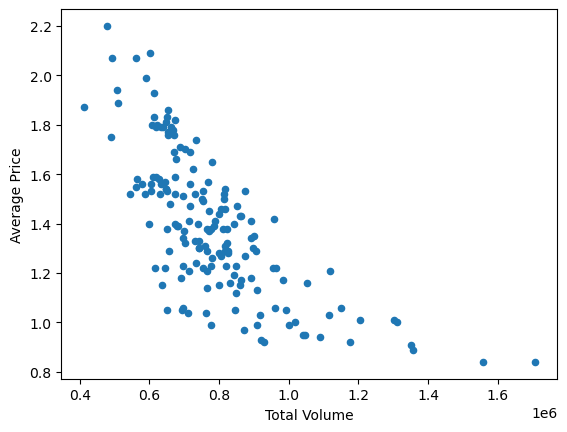

In [3]:
avocados.plot(kind='scatter', x='Total Volume', y='Average Price', ax=plt.gca())


In [4]:
slope, intercept = np.polyfit(avocados['Total Volume'], avocados['Average Price'], 1)
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -1.0909269659806726e-06
The intercept is: 2.2495304122570334


In [5]:
x_fit = np.linspace(avocados['Total Volume'].min(), avocados['Total Volume'].max(), 100)
y_fit = slope * x_fit + intercept


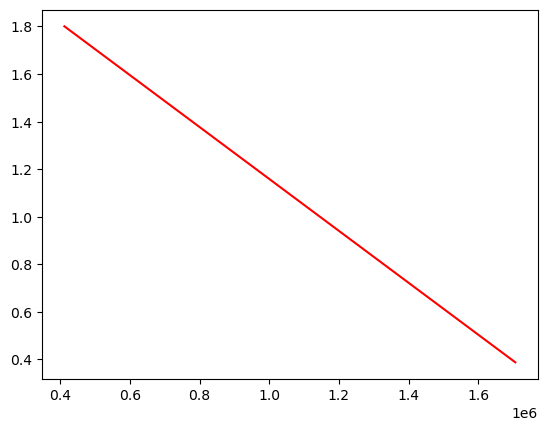

In [6]:
plt.plot(x_fit, y_fit, color='red', label='Fit Line')


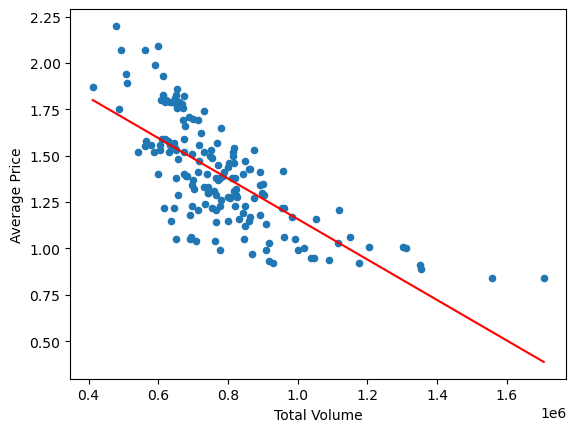

In [7]:
avocados.plot(kind='scatter', x='Total Volume', y='Average Price', ax=plt.gca())
plt.plot(x_fit, y_fit, color='red', label='Fit Line')


In [8]:
avocados

,Date,Average Price,Total Volume
0,2015-12-27,1.05,692206.40
1,2015-12-20,1.15,637091.48
2,2015-12-13,1.22,616016.46
3,2015-12-06,1.06,694982.49
4,2015-11-29,1.05,651638.60
...,...,...,...
164,2018-02-04,0.84,1706251.05
165,2018-01-28,1.38,821352.05
166,2018-01-21,1.01,1301932.95
167,2018-01-14,1.21,1117376.99


In [9]:
avocados['Predicted Price'] = slope * avocados['Total Volume'] + intercept

avocados['Residuals'] = avocados['Average Price'] - avocados['Predicted Price']

avocados 


,Date,Average Price,Total Volume,Predicted Price,Residuals
0,2015-12-27,1.05,692206.40,1.494384,-0.444384
1,2015-12-20,1.15,637091.48,1.554510,-0.404510
2,2015-12-13,1.22,616016.46,1.577501,-0.357501
3,2015-12-06,1.06,694982.49,1.491355,-0.431355
4,2015-11-29,1.05,651638.60,1.538640,-0.488640
...,...,...,...,...,...
164,2018-02-04,0.84,1706251.05,0.388135,0.451865
165,2018-01-28,1.38,821352.05,1.353495,0.026505
166,2018-01-21,1.01,1301932.95,0.829217,0.180783
167,2018-01-14,1.21,1117376.99,1.030554,0.179446


Text(0, 0.5, 'Residuals')

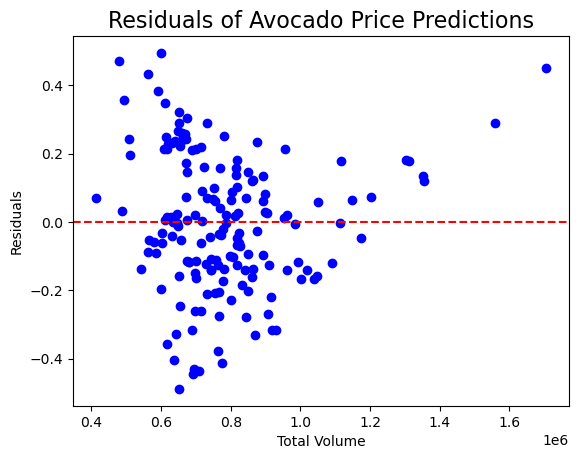

In [10]:

plt.scatter(avocados['Total Volume'], avocados['Residuals'], color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')  
plt.title('Residuals of Avocado Price Predictions', fontsize=16)
plt.xlabel('Total Volume')
plt.ylabel('Residuals')           


In [11]:
avocados['log_Total Volume'] = np.log(avocados['Total Volume'])
avocados['log_Average Price'] = np.log(avocados['Average Price'])
avocados


,Date,Average Price,Total Volume,Predicted Price,Residuals,log_Total Volume,log_Average Price
0,2015-12-27,1.05,692206.40,1.494384,-0.444384,13.447639,0.048790
1,2015-12-20,1.15,637091.48,1.554510,-0.404510,13.364669,0.139762
2,2015-12-13,1.22,616016.46,1.577501,-0.357501,13.331029,0.198851
3,2015-12-06,1.06,694982.49,1.491355,-0.431355,13.451642,0.058269
4,2015-11-29,1.05,651638.60,1.538640,-0.488640,13.387245,0.048790
...,...,...,...,...,...,...,...
164,2018-02-04,0.84,1706251.05,0.388135,0.451865,14.349809,-0.174353
165,2018-01-28,1.38,821352.05,1.353495,0.026505,13.618707,0.322083
166,2018-01-21,1.01,1301932.95,0.829217,0.180783,14.079361,0.009950
167,2018-01-14,1.21,1117376.99,1.030554,0.179446,13.926495,0.190620


In [12]:
slope_sl, intercept_sl = np.polyfit(avocados['Average Price'], avocados['log_Total Volume'], 1)

print("The slope is: ", slope_sl)
print("The intercept is: ", intercept_sl)

The slope is:  -0.5792670374517239
The intercept is:  14.35250686168382


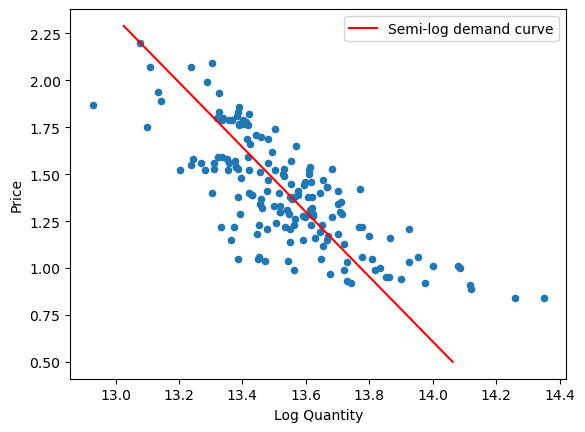

In [13]:
avocados.plot(kind='scatter', x='log_Total Volume', y='Average Price', ax=plt.gca())
prices = np.arange(0.5, 2.3, 0.01)
predicted_quantities = slope_sl * prices + intercept_sl
plt.plot(predicted_quantities, prices, color = 'red', label = "Semi-log demand curve")
plt.xlabel("Log Quantity")
plt.ylabel("Price")
plt.legend();

In [14]:
slope_ll, intercept_ll = np.polyfit(avocados['log_Average Price'], avocados['log_Total Volume'], 1)

print("The slope is: ", slope_ll)
print("The intercept is: ", intercept_ll)

The slope is:  -0.815728589475852
The intercept is:  13.798460905495737


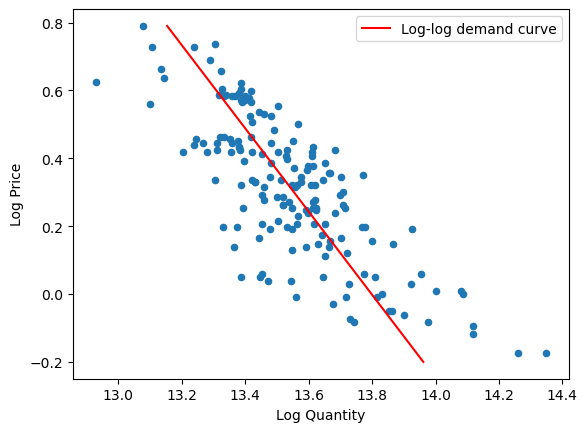

In [15]:
avocados.plot(kind='scatter', x='log_Total Volume', y='log_Average Price', ax=plt.gca())
prices = np.arange(-0.2, 0.8, 0.01)
predicted_quantities = slope_ll * prices + intercept_ll
plt.plot(predicted_quantities, prices, color = 'red', label = "Log-log demand curve")

plt.xlabel("Log Quantity")
plt.ylabel("Log Price")
plt.legend();

for more information follow the Data 88E textbook 